In [1]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [24]:
train_path = "../data/train.csv"
original = pd.read_csv(train_path)
original.columns = original.columns.str.lower()

In [25]:
original[original['customer_id']=='CUS_0x21b1']

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.98667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.00000,Good,605.03,24.46403,26 Years and 7 Months,No,18.81621,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.98667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.00000,Good,605.03,38.55085,26 Years and 8 Months,No,18.81621,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.98667,2,1385,6,1,Credit-Builder Loan,3,-1,5.42,2.00000,_,605.03,33.22495,26 Years and 9 Months,No,18.81621,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
11,0x1611,CUS_0x21b1,April,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,NaN,2,4,6,1,Credit-Builder Loan,3,3_,5.42,2.00000,Good,605.03,39.18266,26 Years and 10 Months,No,18.81621,99.30622796053305,Low_spent_Medium_value_payments,465.6762241330048,Good
12,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.98667,2,4,6,1,Credit-Builder Loan,3,1,6.42,2.00000,Good,605.03,34.97789,26 Years and 11 Months,No,18.81621,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
13,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.98667,2,4,6,1,Credit-Builder Loan,3,0,5.42,2.00000,Good,605.03,33.38101,27 Years and 0 Months,No,18.81621,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good
14,0x1614,CUS_0x21b1,July,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,NaN,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.00000,Good,605.03,31.13170,27 Years and 1 Months,NM,18.81621,70.10177420755677,High_spent_Medium_value_payments,464.8806778859809,Good
15,0x1615,CUS_0x21b1,August,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.98667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.00000,Good,605.03,32.93386,27 Years and 2 Months,No,18.81621,218.90434353388733,Low_spent_Small_value_payments,356.07810855965045,Good


In [26]:
train_df = original.copy()
train_df.columns
train_df.drop(columns=['id','ssn','name','month'], inplace=True)

In [27]:
train_df.head(10)

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23,Scientist,19114.12,1824.84333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.00000,_,809.98,26.82262,22 Years and 1 Months,No,49.57495,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.00000,Good,809.98,31.94496,NaN,No,49.57495,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.00000,Good,809.98,28.60935,22 Years and 3 Months,No,49.57495,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.00000,Good,809.98,31.37786,22 Years and 4 Months,No,49.57495,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,23,Scientist,19114.12,1824.84333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.00000,Good,809.98,24.79735,22 Years and 5 Months,No,49.57495,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,CUS_0xd40,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.00000,Good,809.98,27.26226,22 Years and 6 Months,No,49.57495,62.430172331195294,!@9#%8,340.4792117872438,Good
6,CUS_0xd40,23,Scientist,19114.12,1824.84333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.00000,Good,809.98,22.53759,22 Years and 7 Months,No,49.57495,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,CUS_0xd40,23,Scientist,19114.12,1824.84333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.00000,Good,809.98,23.93379,NaN,No,49.57495,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,CUS_0x21b1,28_,_______,34847.84,3037.98667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.00000,Good,605.03,24.46403,26 Years and 7 Months,No,18.81621,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,CUS_0x21b1,28,Teacher,34847.84,3037.98667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.00000,Good,605.03,38.55085,26 Years and 8 Months,No,18.81621,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               100000 non-null  object 
 1   age                       100000 non-null  object 
 2   occupation                100000 non-null  object 
 3   annual_income             100000 non-null  object 
 4   monthly_inhand_salary     84998 non-null   float64
 5   num_bank_accounts         100000 non-null  int64  
 6   num_credit_card           100000 non-null  int64  
 7   interest_rate             100000 non-null  int64  
 8   num_of_loan               100000 non-null  object 
 9   type_of_loan              88592 non-null   object 
 10  delay_from_due_date       100000 non-null  int64  
 11  num_of_delayed_payment    92998 non-null   object 
 12  changed_credit_limit      100000 non-null  object 
 13  num_credit_inquiries      98035 non-null   fl

In [29]:
train_df.isnull().sum()

customer_id                     0
age                             0
occupation                      0
annual_income                   0
monthly_inhand_salary       15002
num_bank_accounts               0
num_credit_card                 0
interest_rate                   0
num_of_loan                     0
type_of_loan                11408
delay_from_due_date             0
num_of_delayed_payment       7002
changed_credit_limit            0
num_credit_inquiries         1965
credit_mix                      0
outstanding_debt                0
credit_utilization_ratio        0
credit_history_age           9030
payment_of_min_amount           0
total_emi_per_month             0
amount_invested_monthly      4479
payment_behaviour               0
monthly_balance              1200
credit_score                    0
dtype: int64

In [31]:
mapping = {'__-333333333333333333333333333__':np.nan,'__10000__':np.nan}
train_df.replace(mapping, inplace=True)
invalid_patterns = ['', 'nan', '!@9#%8', '#F%$D@*&8', 'NM', 'nm']
train_df = train_df.applymap(lambda x: x if x is np.nan or not isinstance(
    x, str) else str(x).strip('_')).replace(invalid_patterns, np.nan)

train_df['age'] = train_df['age'].astype(int)
train_df['annual_income'] = train_df['annual_income'].astype(float)
train_df['num_of_loan'] = train_df['num_of_loan'].astype(int)
train_df['num_of_delayed_payment'] = train_df['num_of_delayed_payment'].astype(
    float)
train_df['changed_credit_limit'] = train_df['changed_credit_limit'].astype(
    float)
train_df['outstanding_debt'] = train_df['outstanding_debt'].astype(
    float)
train_df['amount_invested_monthly'] = train_df['amount_invested_monthly'].astype(
    float)
train_df['monthly_balance'] = train_df['monthly_balance'].astype(float)

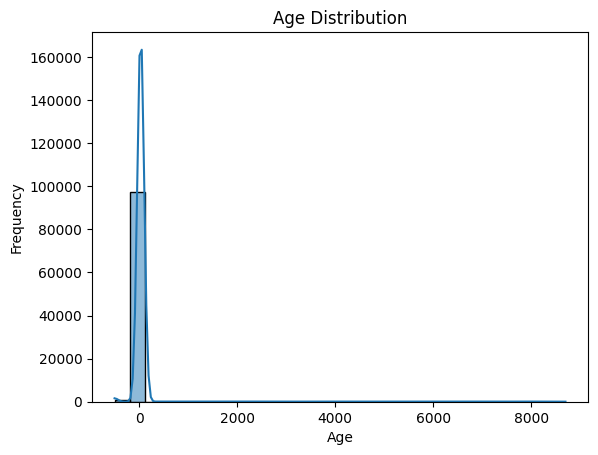

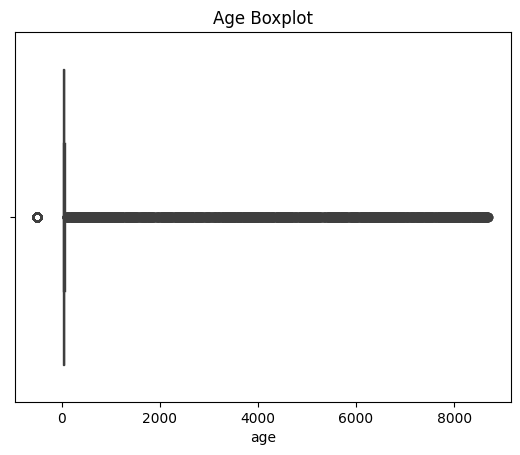

Number of outliers in 'age': 2781
lower_bound: -3.0
upper_bound: 69.0


In [36]:
sns.histplot(train_df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(x=train_df['age'])
plt.title('Age Boxplot')
plt.show()
train_df['age'].describe()
q1 = train_df['age'].quantile(0.25)
q3 = train_df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = train_df[(train_df['age'] < lower_bound) | (train_df['age'] > upper_bound)]
print("Number of outliers in 'age':", outliers.shape[0])
print('lower_bound:', lower_bound)
print('upper_bound:', upper_bound)

In [ ]:
train_df['age'] = train_df['age'].apply(lambda x: np.nan if x < 14 or x > 60 else x)
print(train_df['age'].isnull().sum())
train_df['age'] = train_df.groupby(
    'customer_id')['age'].fillna(method='ffill').fillna(method='bfill')
print(train_df['age'].isnull().sum())

2781

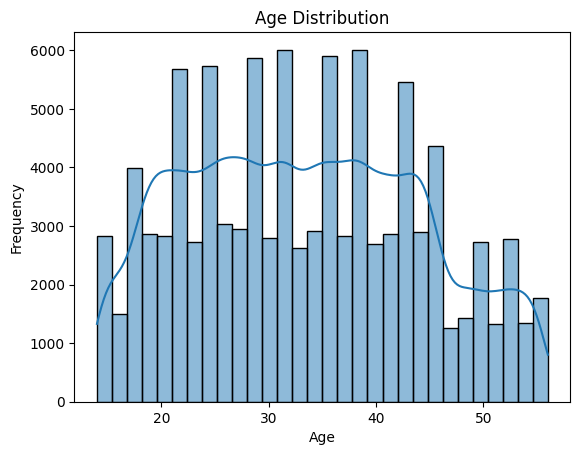

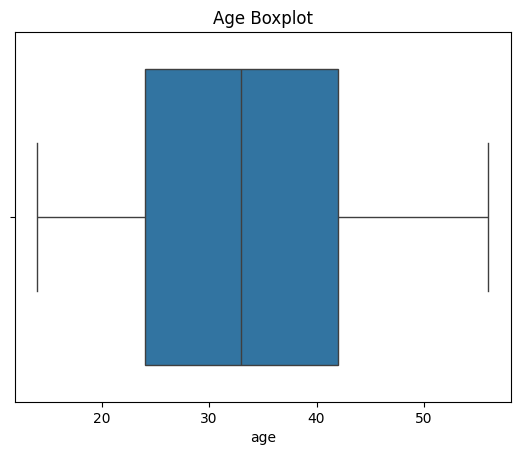

Number of outliers in 'age': 0
lower_bound: -3.0
upper_bound: 69.0


In [40]:
sns.histplot(train_df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(x=train_df['age'])
plt.title('Age Boxplot')
plt.show()
train_df['age'].describe()
q1 = train_df['age'].quantile(0.25)
q3 = train_df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = train_df[(train_df['age'] < lower_bound) | (train_df['age'] > upper_bound)]
print("Number of outliers in 'age':", outliers.shape[0])
print('lower_bound:', lower_bound)
print('upper_bound:', upper_bound)

In [42]:
string_columns = list(
    train_df.dtypes[train_df.dtypes == 'object'].index)

for col in string_columns:
    train_df[col] = train_df[col].str.lower().str.replace(' ', '_')

In [54]:
train_df['occupation'].head(20)

0     scientist
1     scientist
2     scientist
3     scientist
4     scientist
5     scientist
6     scientist
7     scientist
8           NaN
9       teacher
10      teacher
11      teacher
12      teacher
13      teacher
14      teacher
15      teacher
16          NaN
17     engineer
18          NaN
19     engineer
Name: occupation, dtype: object

In [56]:
train_df['occupation'].value_counts(dropna=False)


occupation
lawyer           7096
engineer         6864
architect        6824
mechanic         6776
scientist        6744
accountant       6744
developer        6720
media_manager    6720
teacher          6672
entrepreneur     6648
doctor           6568
journalist       6536
manager          6432
musician         6352
writer           6304
Name: count, dtype: int64

Text(0.5, 1.0, 'Occupation Distribution')

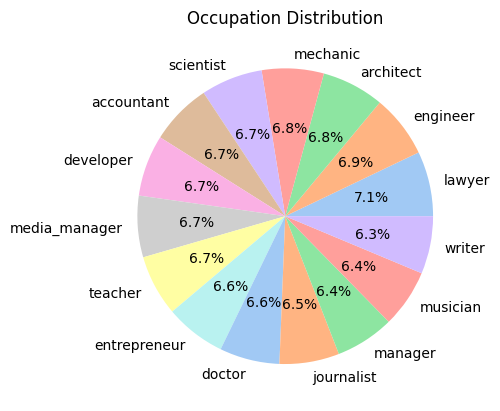

In [68]:
plt.pie(train_df['occupation'].value_counts(), labels=train_df['occupation'].value_counts().index,colors=sns.color_palette('pastel'), autopct='%1.1f%%')
plt.title('Occupation Distribution')

In [55]:
# Fill within customer groups first
train_df['occupation'] = train_df.groupby(
    'customer_id')['occupation'].fillna(method='ffill')
train_df['occupation'] = train_df.groupby(
    'customer_id')['occupation'].fillna(method='bfill')

In [84]:
train_df['payment_behaviour'].value_counts(dropna=False)


payment_behaviour
low_spent_small_value_payments      27767
high_spent_medium_value_payments    19366
high_spent_large_value_payments     15348
low_spent_medium_value_payments     14621
high_spent_small_value_payments     11980
low_spent_large_value_payments      10918
Name: count, dtype: int64

In [81]:
train_df['payment_behaviour'] = train_df.groupby('customer_id')['payment_behaviour'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown'))

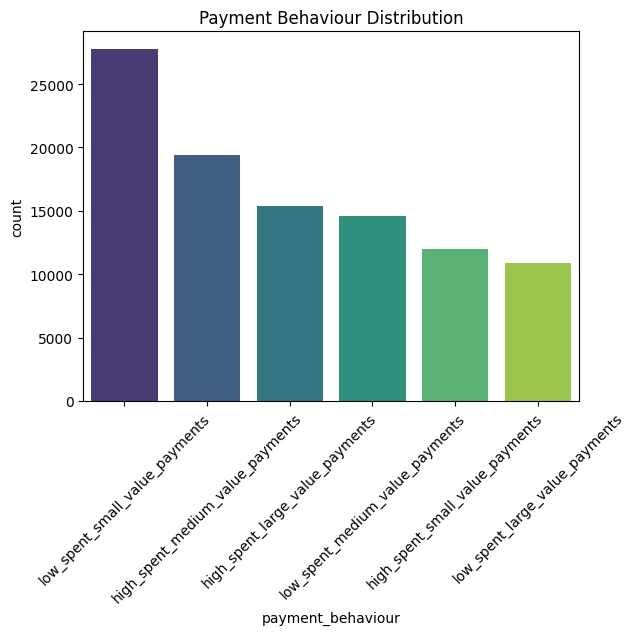

In [83]:
sns.barplot(x=train_df['payment_behaviour'].value_counts(dropna=False).index, y=train_df['payment_behaviour'].value_counts(dropna=False), palette='viridis')
plt.title('Payment Behaviour Distribution')
plt.xticks(rotation=45)
plt.show()

In [89]:
integer_columns = ['age',
                   'num_bank_accounts',
                   'num_credit_card',
                   'interest_rate',
                   'num_of_loan',
                   'delay_from_due_date',
                   'num_of_delayed_payment',
                   'num_credit_inquiries'
                   ]

float_columns = ['credit_utilization_ratio',
                 'annual_income',
                 'monthly_inhand_salary',
                 'changed_credit_limit',
                 'outstanding_debt',
                 'total_emi_per_month',
                 'amount_invested_monthly',
                 'monthly_balance']

numerical_columns = integer_columns + float_columns

Number of outliers in age: 0


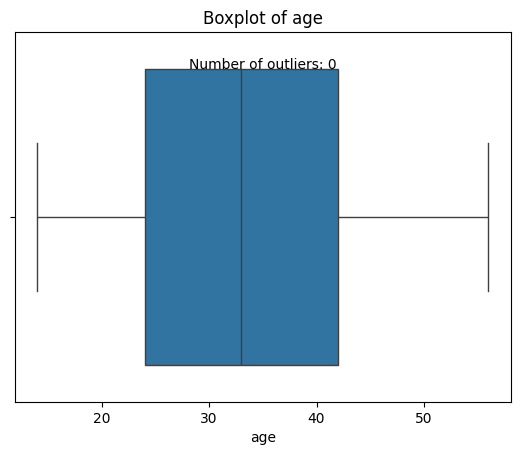

Number of outliers in num_bank_accounts: 1315


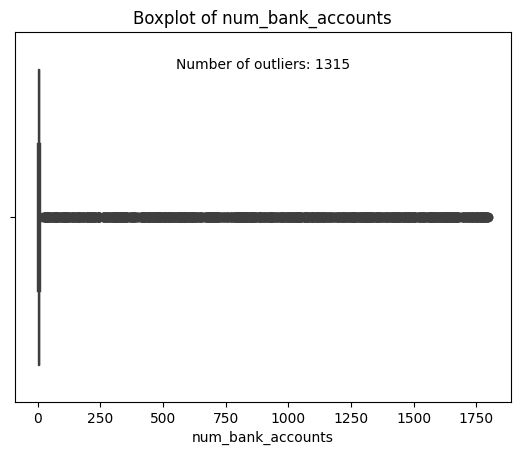

Number of outliers in num_credit_card: 2271


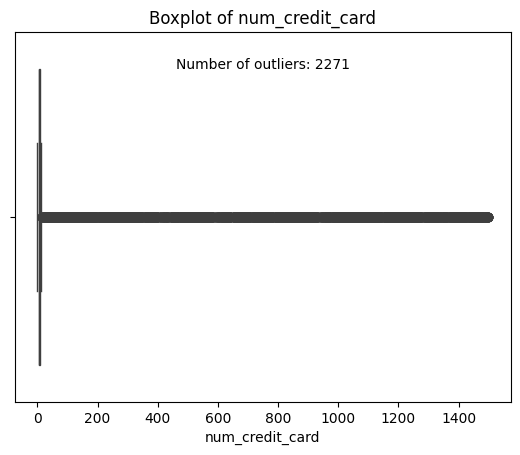

Number of outliers in interest_rate: 2034


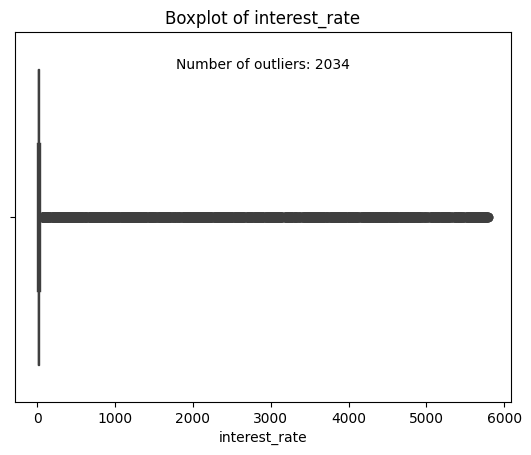

Number of outliers in num_of_loan: 4348


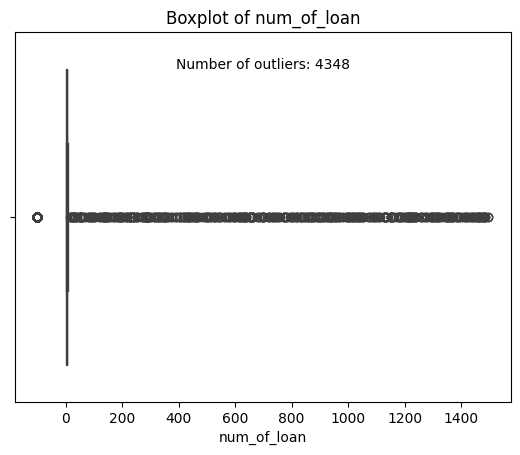

Number of outliers in delay_from_due_date: 4002


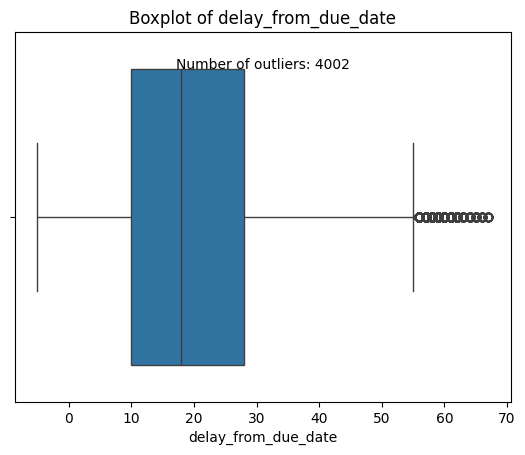

Number of outliers in num_of_delayed_payment: 736


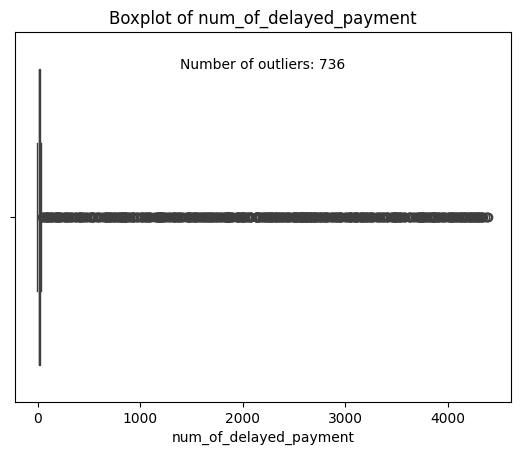

Number of outliers in num_credit_inquiries: 1650


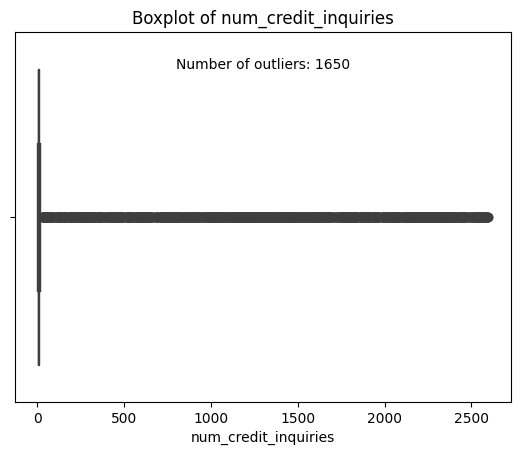

Number of outliers in credit_utilization_ratio: 4


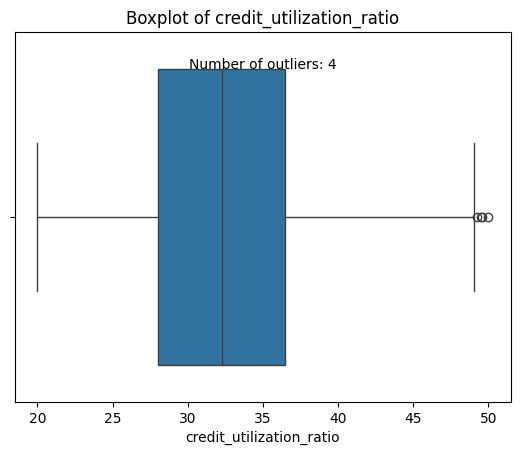

Number of outliers in annual_income: 2783


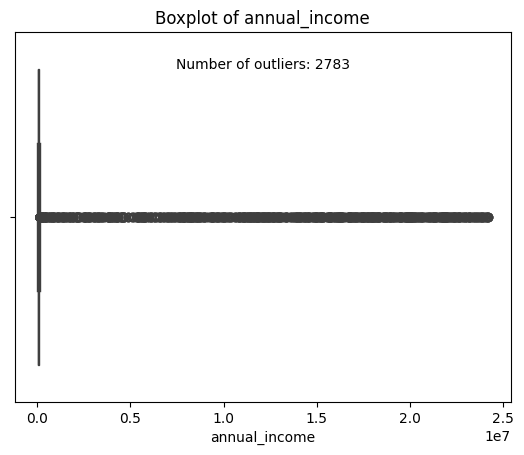

Number of outliers in monthly_inhand_salary: 1683


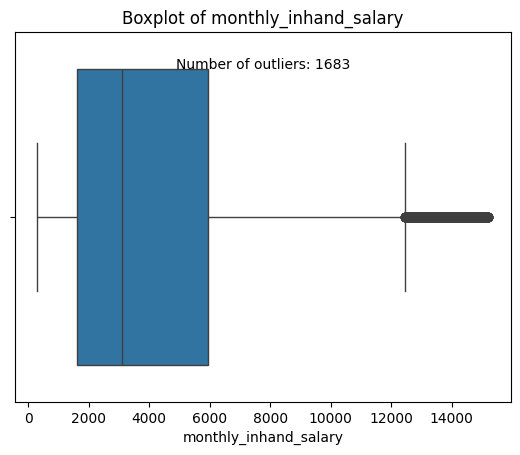

Number of outliers in changed_credit_limit: 668


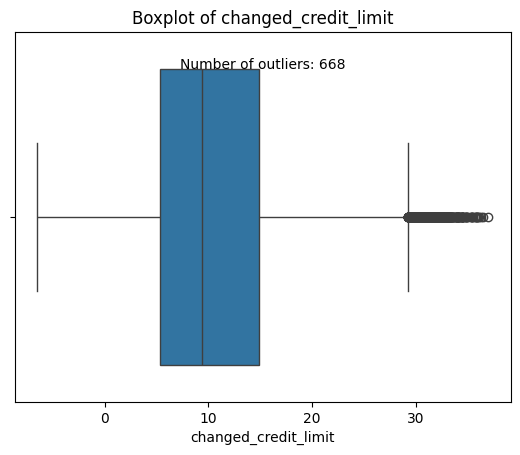

Number of outliers in outstanding_debt: 5272


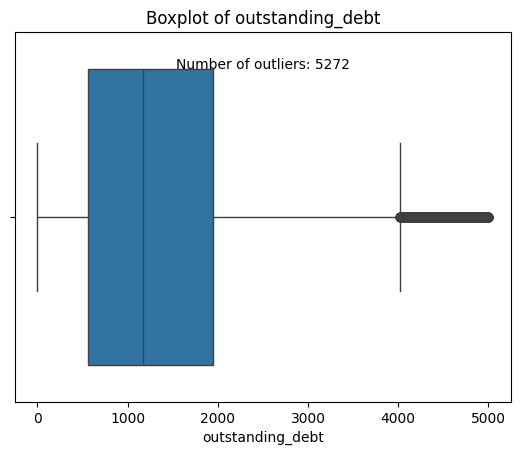

Number of outliers in total_emi_per_month: 6795


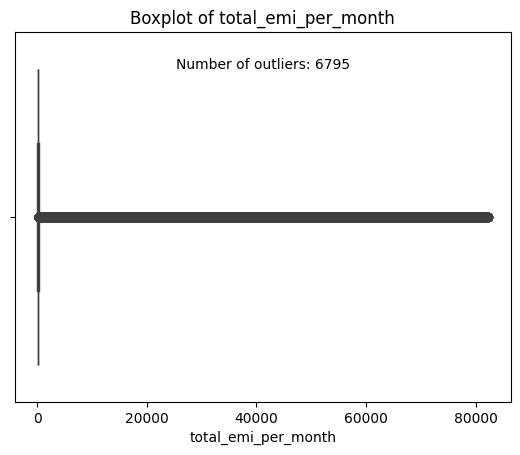

Number of outliers in amount_invested_monthly: 7568


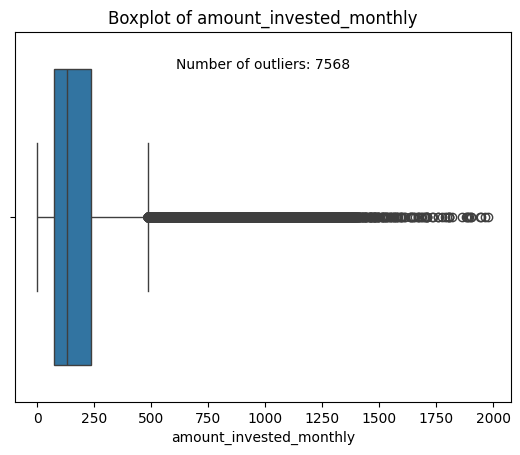

Number of outliers in monthly_balance: 7627


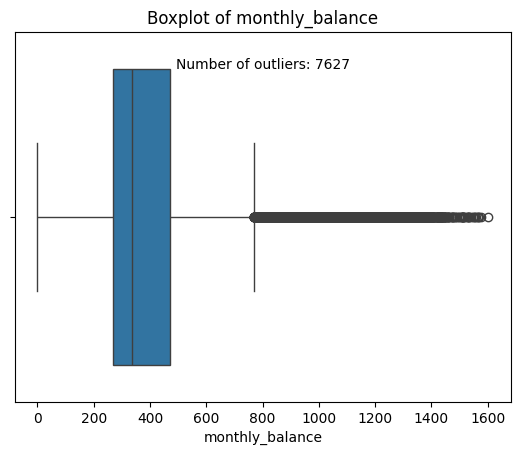

In [90]:
for col in numerical_columns:
    q1 = train_df[col].quantile(0.25)
    q3 = train_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
    print(f'Number of outliers in {col}: {outliers.shape[0]}')
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.annotate(f'Number of outliers: {outliers.shape[0]}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center')
    plt.show()

In [91]:
train_df['credit_history_age'].value_counts

<bound method IndexOpsMixin.value_counts of 0         22_years_and_1_months
1                           NaN
2         22_years_and_3_months
3         22_years_and_4_months
4         22_years_and_5_months
                  ...          
99995     31_years_and_6_months
99996     31_years_and_7_months
99997     31_years_and_8_months
99998     31_years_and_9_months
99999    31_years_and_10_months
Name: credit_history_age, Length: 100000, dtype: object>

Credit Score Distribution:
  📊 standard: 53,174 (53.17%)
  📊 poor: 28,998 (29.00%)
  📊 good: 17,828 (17.83%)
⚠️  Class imbalance detected! Ratio: 2.98:1


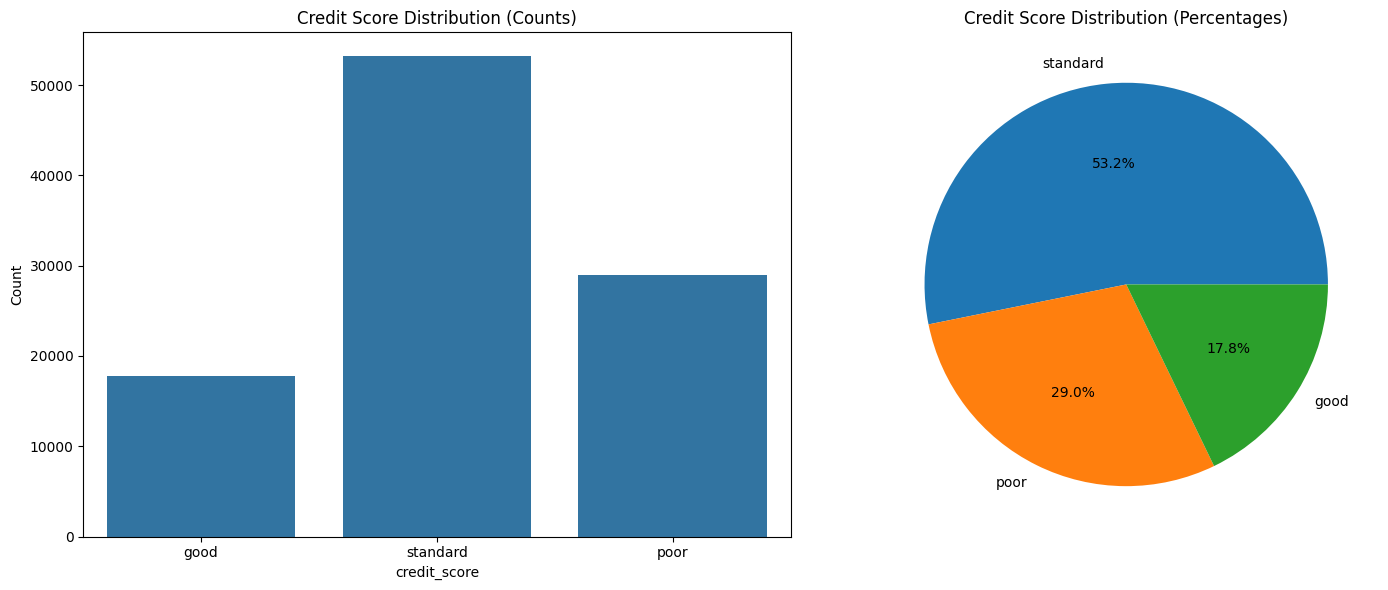

In [92]:
# Basic statistics
credit_counts = train_df['credit_score'].value_counts(dropna=False)
credit_pct = train_df['credit_score'].value_counts(normalize=True, dropna=False) * 100

print("Credit Score Distribution:")
for score in credit_counts.index:
    count = credit_counts[score]
    pct = credit_pct[score]
    print(f"  📊 {score}: {count:,} ({pct:.2f}%)")

# Check for class imbalance
max_pct = credit_pct.max()
min_pct = credit_pct.min()
imbalance_ratio = max_pct / min_pct

if imbalance_ratio > 2:
    print(f"⚠️  Class imbalance detected! Ratio: {imbalance_ratio:.2f}:1")
else:
    print(f"✅ Classes are relatively balanced. Ratio: {imbalance_ratio:.2f}:1")
# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
sns.countplot(data=train_df, x='credit_score', ax=axes[0])
axes[0].set_title('Credit Score Distribution (Counts)')
axes[0].set_ylabel('Count')

# Pie chart
axes[1].pie(credit_counts.values, labels=credit_counts.index, autopct='%1.1f%%')
axes[1].set_title('Credit Score Distribution (Percentages)')

plt.tight_layout()
plt.show()